In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
%matplotlib inline

In [2]:
train_data = np.loadtxt('./.cleaned_data_train_Data.csv',delimiter=',',dtype=int)

In [3]:
classifier_freq = np.zeros( 10, dtype=int )
pixel_freq = np.ones( (28*28,10), dtype=int )
N = train_data.shape[0]
D = train_data.shape[1]

In [4]:
for i in range(N):
    c = train_data[i,0]
    classifier_freq[c] = classifier_freq[c] + 1
    for j in range(28 * 28):
        if train_data[i,1:][j] == 1:
            pixel_freq[j,c] = pixel_freq[j,c]+1

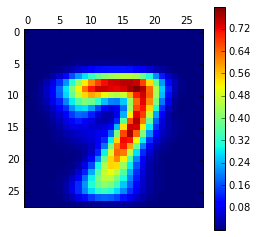

In [5]:
plt.matshow((pixel_freq[:,7] / classifier_freq[7]).reshape(28,28))
plt.colorbar()
plt.show()

In [6]:
def log_posterior(pixels):
    lp = np.zeros(10)
    for c in range(10):
        lp[c] = lp[c] + math.log(classifier_freq[c] / N)
        for j in range (28 * 28):
            if pixels[j] == 1:
                lp[c] = lp[c] + math.log(pixel_freq[j,c] / classifier_freq[c])
            else:
                lp[c] = lp[c] + math.log(1 - (pixel_freq[j,c] / classifier_freq[c]))
    return lp

In [7]:
test_data = np.loadtxt('./.cleaned_data_test_Data.csv',delimiter=',',dtype=int)

In [12]:
counter = 0
for s in range(test_data.shape[0]):
    if test_data[s,0] == np.argmax(log_posterior(test_data[s,1:])):
        counter = counter + 1


In [13]:
print(counter / test_data.shape[0])

0.8435
